# CS188 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [1]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [2]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [4]:
ds = pd.read_csv('./heartdisease.csv')

### Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [5]:
ds.head()     

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


### Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problemmatic and why?

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


#### oldpeak is a float, sick is bool and all the other ones are int. The only one that might cause some problems is sick and that's because some models only work with numerical values. 

### Determine if we're dealing with any null values. If so, report on which columns? 

In [7]:
ds.isnull().values.any()

False

#### No, there is no null value in this DF.

### Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe. (hint: try label encoder or .astype()

In [8]:
ds['sick'] = ds['sick']*1
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


### Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023FF0D23670>,
      dtype=object)

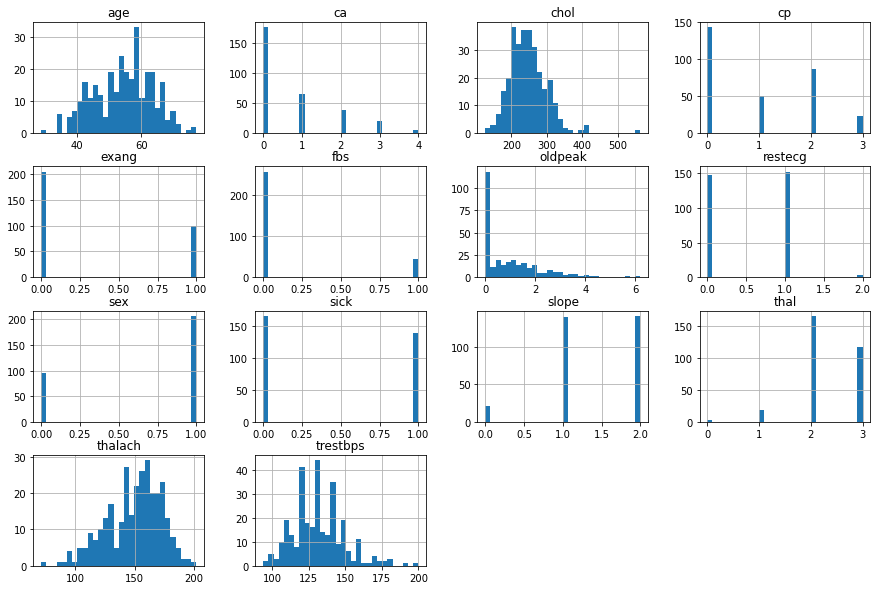

In [9]:
ds.hist(bins=30, figsize=(15, 10))

### Exang, fbs, sex, sick are boolean.
### Ca, cp, restecg, slope, thal are limited selection.
### Age, chol, oldpeak, thalach, trestbps are gradient.

### We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

Number of sick =  138
Number of healthy =  165


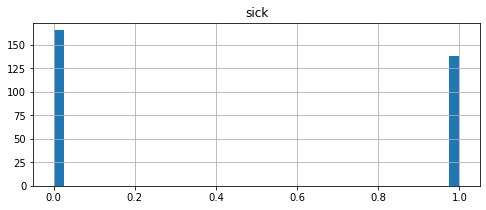

In [10]:
ds.hist(column = 'sick', bins=40, figsize=(8, 3))
noOfsick = len(ds[ds['sick'] == 1])
noOfhealthy = len(ds[ds['sick'] == 0])
print("Number of sick = " , noOfsick)
print("Number of healthy = ", noOfhealthy)

### The numbers are close enough: 
### Number of sick =  138
### Number of healthy =  165

### Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

#### The problem is that we need to use methods like undersampling and oversampling. After these our data might not represent the data in the real world well and our result becomes unusable for real world problems. Removing data may increase the variance of the classifier and may potentially discard useful or important samples. 

### Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

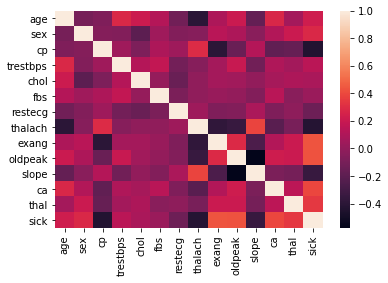

In [11]:
import seaborn as sns; 
ax = sns.heatmap(ds.corr())

#### It seems like that there is a correlation between sick and exang, oldpeak, ca, thal. These values show information like reversable defect, the number of vessels colored by fluoroscopy, etc and when these are 1 or higher values it is obvious that the probability of sickness goes higher too. Also, age has a correlation with some of these values like oldpeak, ca, and some others like trestbps and cholserum which makes sense. thalach and slope correlate too because one is the maximum heart rate and the other is the slope of the peak exercise. Most of the other values don't have any strong correlation. 

## Part 2. Prepare the Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Save the label column as a separate array and then drop it from the dataframe. 

In [12]:
sickArr = ds['sick']
newDS = ds.drop(['sick'], axis=1)

newDS

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


### First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 80% of your total dataframe (hint: use the train_test_split method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(newDS, sickArr, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


### In lecture we learned about K-Nearest Neighbor. One thing we noted was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [15]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_prid = neigh.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_prid)

0.6885245901639344

### Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler

### Pipeline:

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin


health_nolab = newDS.drop(columns= ["ca","cp","restecg", "slope", "thal"], axis=1) # remove the categorical feature


num_pipeline = Pipeline([('std_scaler', StandardScaler())])

health_nolab_tr = num_pipeline.fit_transform(health_nolab)
numerical_features = list(health_nolab)
categorical_features = ["ca","cp","restecg", "slope", "thal"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ])

health_prepared = full_pipeline.fit_transform(newDS)

### Now split your pipelined data into an 80/20 split and again run the same KNN, and report out on it's accuracy. Discuss the implications of the different results you are obtaining.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(health_prepared, sickArr, test_size=0.2, random_state=42)

In [23]:
pip_neigh = KNeighborsClassifier()
pip_neigh.fit(X_train, y_train)
y_prid = pip_neigh.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_prid)

0.8688524590163934

#### The accuracy increased by 20 percent even though I didn't do any complex modification. This shows that pipeline can help a lot in training and we can get better results with just some simple steps. For categorical features, I used one-hot encoding and that usually helps the model to understand the distance better. Also, I used StandardScaler which standardizes features by removing the mean and scaling to unit variance. These had the main impact on the accuracy. 

### Parameter Optimization.  As we saw in HW1, the KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 7, 9, 10, 20, and 50. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [28]:
k_values = [1, 2, 3, 5, 7, 9, 10, 20, 50]
Accuracy_values = []
j = 0
for i in k_values:
    pip_neigh = KNeighborsClassifier (n_neighbors = i)
    pip_neigh.fit(X_train, y_train)
    y_prid = pip_neigh.predict(X_test)
    Accuracy_values.append(accuracy_score(y_test, y_prid)) 
    print("k =",i," ", Accuracy_values[j])
    j += 1

k = 1   0.819672131147541
k = 2   0.9180327868852459
k = 3   0.9016393442622951
k = 5   0.8688524590163934
k = 7   0.8688524590163934
k = 9   0.8688524590163934
k = 10   0.8524590163934426
k = 20   0.8524590163934426
k = 50   0.8852459016393442


## Part 3. Additional Learning Methods 

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### Logistic Regression

Let's now try another classifier, we introduced in lecture, one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. Report on the same four metrics as the SVM and graph the resulting ROC curve.

In [46]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
y_pred_log = clf.predict(X_test)

In [47]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_log)

0.8852459016393442


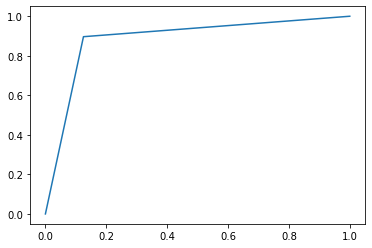

In [49]:
print(accuracy_score(y_test, y_pred_log))
plt.plot(fpr,tpr)
plt.show()

### Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

#### tpr is the percentage of actual positives that are correctly identified and fpr is the percentage of actual negatives that are wrongly identified. These values are important because we can use them to find recall and precision which in some cases are better than accuracy. Precision is a good measure to determine when the costs of False Positive is high. For example, we should use precision for email spam detection. Thresholds show the values that when a data is more than or less than those values goes to a specific class depending on that.

### Describe what an ROC curve is and what the results of this graph seem to be indicating

ROC curve is a way to monitor the performance of a binary classifier. The y-axis shows the amount of true positive rate, so when the line is closer to the top left it shows that our model is performing better. From this graph, we can say that linear regression works well on the data set. 

### Let's tweak a few settings. First let's set your solver to 'sag', your max_iter= 10, and set penalty = 'none' and rerun your model. Let's see how your results change!

In [50]:
clf = LogisticRegression(random_state = 0, solver = 'sag', penalty = 'none', max_iter = 10).fit(X_train, y_train)
y_pred_log = clf.predict(X_test)

D:\Users\krato\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

In [51]:
clf = LogisticRegression(solver = 'sag', penalty = 'none', max_iter = 10000).fit(X_train, y_train)
y_pred_log = clf.predict(X_test)

0.8688524590163934


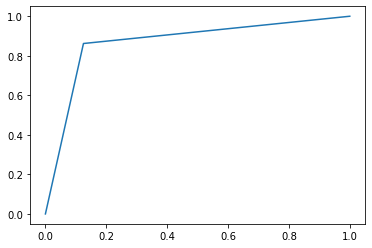

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_log)
print(accuracy_score(y_test, y_pred_log))
plt.plot(fpr,tpr)
plt.show()

### Explain what you changed, and why do you think, even though you 'fixed' the problem, that you may have harmed the outcome. What other Parameters you set may have impacted this result?

I changed the number of iteration and made it larger(1000). An algorithm is said to converge when, as the iterations proceed, the output gets closer and closer to some specific value. when the iteration limit is small, the algorithm can't get to that specific value and gives us a warning. Sag might be another problem because from the documents we know that "sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale."

### Rerun your logistic classifier, but modify the penalty = 'l1', solver='liblinear' and again report the results.

In [58]:
clf = LogisticRegression(solver = 'liblinear', penalty = 'l1', max_iter = 1000).fit(X_train, y_train)
y_pred_log = clf.predict(X_test)

0.8852459016393442


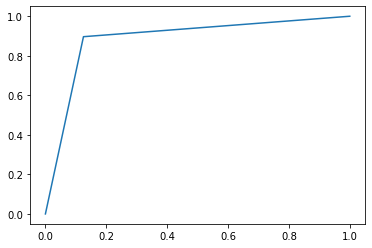

In [59]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_log)
print(accuracy_score(y_test, y_pred_log))
plt.plot(fpr,tpr)
plt.show()

### Explain what what the two solver approaches are, and why the liblinear likely produced the optimal outcome. 

The liblinear solver uses L1 regularization and shrinks the parameters to zero to get a better result. The SAG solver uses Stochastic Average Gradient which is just another type of gradient descent and works well on a large data set. Our data here is not very large so liblinear might be a better choice because it uses regularization too which can be very helpful. 

### We also played around with different penalty terms (none, L1 etc.) Describe what the purpose of a penalty term is and how an L1 penalty works.

The penalty is used to specify the norm used in the penalization. L1 penalty is equal to the absolute value of the magnitude of coefficients. It limits the size of the coefficients. L1 can make models with few coefficients and some coefficients can become zero and eliminated.

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [61]:
clf = SVC(probability = True).fit(X_train, y_train)
y_pred_log = clf.predict(X_test)

### Report the accuracy, precision, recall, F1 Score, and confusion matrix and ROC Curve of the resulting model.

accuracy is = 0.8852459016393442
precision is =  0.84375
recall is = 0.9310344827586207
f1 is = 0.8852459016393444
confusion is =
[[27  5]
 [ 2 27]]


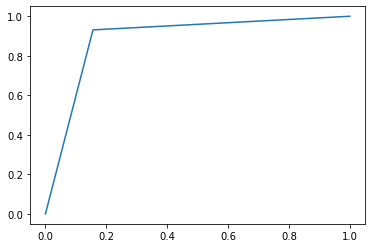

In [68]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


print("accuracy is =",accuracy_score(y_test, y_pred_log))
print("precision is = ", precision_score(y_test, y_pred_log))
print("recall is =", recall_score(y_test, y_pred_log))
print("f1 is =", f1_score(y_test, y_pred_log))
print("confusion is =")
print( confusion_matrix(y_test, y_pred_log))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_log)
plt.plot(fpr,tpr)
plt.show()

### Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

accuracy is = 0.8688524590163934
precision is =  0.8387096774193549
recall is = 0.896551724137931
f1 is = 0.8666666666666666
confusion is =
[[27  5]
 [ 3 26]]


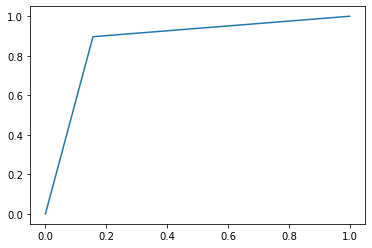

In [69]:
clf = SVC(probability = True, kernel = 'linear').fit(X_train, y_train)
y_pred_log = clf.predict(X_test)

print("accuracy is =",accuracy_score(y_test, y_pred_log))
print("precision is = ", precision_score(y_test, y_pred_log))
print("recall is =", recall_score(y_test, y_pred_log))
print("f1 is =", f1_score(y_test, y_pred_log))
print("confusion is =")
print( confusion_matrix(y_test, y_pred_log))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_log)
plt.plot(fpr,tpr)
plt.show()

### Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

From the new graph, we can see that our result is not as accurate as of the previous one. For SVM, we usually use a sigmoid function for the kernel but here we used a linear function. Our data is not very linear and that caused the result to be worse.

### Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

Logistic regression assumes that the predictors aren't sufficient to determine the response variable, but determine a probability that is a logistic function of a linear combination of them. On the other hand, SVM uses a separating hyperplane to do the prediction. SVM only considers points near the margin but LR considers all the points in the data set.

## Baysian (Statistical) Classification

In class we learned about Naive Bayes, and statistical classification.

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable Y  and dependent feature vector X1 through Xn. 

### Please implement a Naive Bayes Classifier on the pipelined data. For this model simply use the default parameters. Report out the number of mislabeled points that result, along with the accuracy, precision, recall, F1 Score and Confusion Matrix. Refer to documentation on implementing a NB Classifier [here](https://scikit-learn.org/stable/modules/naive_bayes.html)

accuracy is = 0.4918032786885246
precision is =  0.48214285714285715
recall is = 0.9310344827586207
f1 is = 0.6352941176470589
confusion is =
[[ 3 29]
 [ 2 27]]


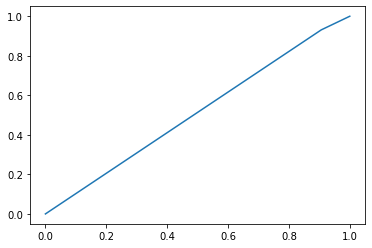

In [72]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_bays = gnb.fit(X_train, y_train).predict(X_test)

print("accuracy is =",accuracy_score(y_test, y_pred_bays))
print("precision is = ", precision_score(y_test, y_pred_bays))
print("recall is =", recall_score(y_test, y_pred_bays))
print("f1 is =", f1_score(y_test, y_pred_bays))
print("confusion is =")
print( confusion_matrix(y_test, y_pred_bays))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_bays)
plt.plot(fpr,tpr)
plt.show()

### Discuss the observed results. What assumptions about our data are we making here and why might those be inacurate?

From the document, we know that when we use Naive Bayes we are assuming that there is conditional independence between every pair of features given the value of the class variable. However, this is not true for our data set because some of them are dependent and that makes the result very bad.

## Cross Validation and Model Selection

You've sampled a number of different classification techniques, leveraging clusters, linear classifiers, and Statistical Classifiers, as well as experimented with tweak different parameters to optimize perfiormance. Based on these experiments you should have settled on a particular model that performs most optimally on the chosen dataset. 

Before our work is done though, we want to ensure that our results are not the result of the random sampling of our data we did with the Train-Test-Split. To ensure otherwise we will conduct a K-Fold Cross-Validation of our top two performing models, assess their cumulative performance across folds, and determine the best model for our particular data. 

## Select your top 2 performing models and run a K-Fold Cross Validation on both (use 10 folds). Report your best performing model.

In [73]:
from sklearn.model_selection import KFold
#health_prepared, sickArr
kf = KFold(n_splits = 10)
kf.get_n_splits(health_prepared)

10

In [79]:
#Linear regression
Accuracy_values = []
j = 0
for train_index, test_index in kf.split(health_prepared):
    X_train, X_test = health_prepared[train_index], health_prepared[test_index]
    y_train, y_test = sickArr[train_index], sickArr[test_index]
    clf = LogisticRegression().fit(X_train, y_train)
    y_pred_log = clf.predict(X_test)
    Accuracy_values.append(accuracy_score(y_test, y_pred_log)) 
    print("Fold =", j ," ", Accuracy_values[j])
    j += 1


Fold = 0   0.9354838709677419
Fold = 1   0.8387096774193549
Fold = 2   0.8064516129032258
Fold = 3   0.8
Fold = 4   0.8666666666666667
Fold = 5   0.8333333333333334
Fold = 6   0.8666666666666667
Fold = 7   0.8666666666666667
Fold = 8   0.8333333333333334
Fold = 9   0.6


In [82]:
#KNN model
Accuracy_values = []
j = 0
for train_index, test_index in kf.split(health_prepared):
    X_train, X_test = health_prepared[train_index], health_prepared[test_index]
    y_train, y_test = sickArr[train_index], sickArr[test_index]
    clf = KNeighborsClassifier (n_neighbors = 2).fit(X_train, y_train)
    y_pred_log = clf.predict(X_test)
    Accuracy_values.append(accuracy_score(y_test, y_pred_log)) 
    print("Fold =", j ," ", Accuracy_values[j])
    j += 1


Fold = 0   0.967741935483871
Fold = 1   0.8387096774193549
Fold = 2   0.9032258064516129
Fold = 3   0.8666666666666667
Fold = 4   0.8333333333333334
Fold = 5   0.7333333333333333
Fold = 6   0.3333333333333333
Fold = 7   0.6666666666666666
Fold = 8   0.5666666666666667
Fold = 9   0.4666666666666667


#### From this, we can understand that knn doesn't perform very well when we use it on different folds. However, linear regression has more than 80% accuracy on almost all of the folds. Thus I think linear regression has the best performance. 